### RNN
- https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/
- 시계열 데이터 -> RNN,LSTM

----

이미지 캡셔닝 => 사진에 설명을 붙이는것(이미지를 설명하는 캡션)
- 구글링 딥러닝 이미지 캡셔닝 -> git 자료 많음

# 간단한 인공신경망(ANN)

In [2]:
import numpy as np

# 활성화 함수: 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 활성화 함수의 미분
def sigmoid_derivative(x):
    return x * (1 - x)

# 입력 데이터
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# 출력 데이터
y = np.array([[0],
              [1],
              [1],
              [0]])

# 가중치 초기화
np.random.seed(1)
input_neurons = 2
hidden_neurons = 4
output_neurons = 1
hidden_weights = np.random.uniform(size=(input_neurons, hidden_neurons))
output_weights = np.random.uniform(size=(hidden_neurons, output_neurons))

# 학습률
learning_rate = 0.1

# 학습 횟수
epochs = 10000

# 훈련
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(X, hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights)
    output = sigmoid(output_layer_input)

    # Backpropagation
    # Output layer
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)

    # Hidden layer
    hidden_error = output_delta.dot(output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Weight updates
    output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
    hidden_weights += X.T.dot(hidden_delta) * learning_rate

# 예측
hidden_layer_input = np.dot(X, hidden_weights)
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, output_weights)
predicted_output = sigmoid(output_layer_input)
print("Predicted Output:")
print(predicted_output)


Predicted Output:
[[0.15869528]
 [0.85150775]
 [0.84681193]
 [0.1498315 ]]


# GPT가 짠 RNN

Epoch 1, Loss: 2.278537848328659
Epoch 2, Loss: 1.1100191852343118
Epoch 3, Loss: 1.5645435917869066
Epoch 4, Loss: 0.9741614372602736
Epoch 5, Loss: 1.3853366830601561
Epoch 6, Loss: 1.6377294903735429
Epoch 7, Loss: 1.4036888620083907
Epoch 8, Loss: 1.4087987638628705
Epoch 9, Loss: 1.168609253745984
Epoch 10, Loss: 1.1397044534074194
Epoch 11, Loss: 0.9580408474443148
Epoch 12, Loss: 1.0514178065832789
Epoch 13, Loss: 1.689899693984866
Epoch 14, Loss: 2.1064271508627064
Epoch 15, Loss: 1.5493108652471874
Epoch 16, Loss: 0.9924222359175637
Epoch 17, Loss: 1.1429581110612284
Epoch 18, Loss: 1.1715215746410983
Epoch 19, Loss: 1.3313443461469476
Epoch 20, Loss: 0.9128324764163842
Epoch 21, Loss: 1.5509546108483918
Epoch 22, Loss: 1.103019090451135
Epoch 23, Loss: 0.9902073659154537
Epoch 24, Loss: 1.3481692237075977
Epoch 25, Loss: 1.322034178958306
Epoch 26, Loss: 1.2905077419740902
Epoch 27, Loss: 0.4760346676846302
Epoch 28, Loss: 1.14552246279463
Epoch 29, Loss: 0.7984918102048144
E

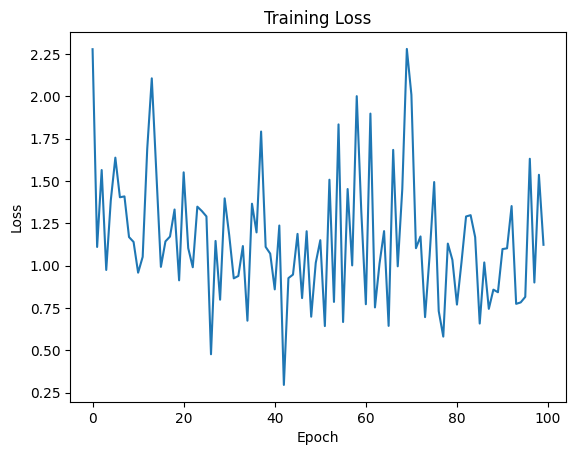

In [9]:
import numpy as np

# 시퀀스 데이터 생성
# 입력 시퀀스 길이: 10, 입력 차원: 3
X = np.random.randn(10, 3)

# RNN의 파라미터 정의
input_size = 3
hidden_size = 4
output_size = 2

# 가중치 초기화
Wxh = np.random.randn(input_size, hidden_size) # 입력에서 은닉층으로 가는 가중치
Whh = np.random.randn(hidden_size, hidden_size) # 은닉층에서 은닉층으로 가는 가중치
Why = np.random.randn(hidden_size, output_size) # 은닉층에서 출력층으로 가는 가중치

# 편향 초기화
bh = np.zeros((1, hidden_size)) # 은닉층의 편향
by = np.zeros((1, output_size)) # 출력층의 편향

# 학습률 설정
learning_rate = 1e-2

# RNN 정의
def rnn_step_forward(x, prev_h, Wxh, Whh, Why, bh, by):
    # 은닉층의 활성화 계산
    a = np.dot(x, Wxh) + np.dot(prev_h, Whh) + bh
    h = np.tanh(a)
    
    # 출력층의 활성화 계산
    y = np.dot(h, Why) + by
    
    # 결과 반환
    return h, y

# RNN 학습
h_prev = np.zeros((1, hidden_size)) # 초기 은닉 상태
for t in range(len(X)):
    # t 시점의 입력과 이전 은닉 상태를 이용하여 RNN 실행
    h_next, _ = rnn_step_forward(X[t].reshape(1, -1), h_prev, Wxh, Whh, Why, bh, by)
    
    # 다음 시점을 위해 은닉 상태 업데이트
    h_prev = h_next

# 이제 여기에 손실 함수를 정의하고 역전파 알고리즘을 추가하여 학습을 진행할 수 있습니다.
# 손실 함수 정의: 평균 제곱 오차
def loss_function(predictions, targets):
    return np.mean(np.square(predictions - targets))

# 역전파 함수 정의
def rnn_step_backward(dh_next, h_prev, x, Wxh, Whh, Why, bh, by):
    # 출력층의 그래디언트 계산
    dWhy = np.dot(h_prev.T, dh_next)
    dby = np.sum(dh_next, axis=0, keepdims=True)
    
    # 은닉층의 그래디언트 계산
    dh_raw = (1 - h_prev**2) * np.dot(dh_next, Why.T)
    dbh = np.sum(dh_raw, axis=0, keepdims=True)
    
    # 입력층과 은닉층 각각의 가중치와 편향에 대한 그래디언트 계산
    dWxh = np.dot(x.T, dh_raw)
    dWhh = np.dot(h_prev.T, dh_raw)
    
    # 입력에 대한 그래디언트 계산
    dx = np.dot(dh_raw, Wxh.T)
    
    return dx, dWxh, dWhh, dWhy, dbh, dby

# 학습률 설정
learning_rate = 0.01

# 학습 반복 횟수 설정
num_epochs = 100
losses = []

# 학습 루프
for epoch in range(num_epochs):
    # 손실 초기화
    total_loss = 0
    
    # 초기 은닉 상태 설정
    h_prev = np.zeros((1, hidden_size))
    
    # 각 시점에 대해 RNN 실행 및 역전파 수행
    for t in range(len(X)):
        x_t = X[t].reshape(1, -1)
        y_true = np.random.randn(1, output_size)  # 예시를 위한 랜덤한 타겟값
        
        # RNN 전방향 전달
        h_next, y_pred = rnn_step_forward(x_t, h_prev, Wxh, Whh, Why, bh, by)
        
        # 손실 계산
        loss = loss_function(y_pred, y_true)
        total_loss += loss
        
        # 출력값에 대한 그래디언트 계산
        dy = 2.0 * (y_pred - y_true)
        
        # 역전파
        dx, dWxh, dWhh, dWhy, dbh, dby = rnn_step_backward(dy, h_prev, x_t, Wxh, Whh, Why, bh, by)
        
        # 가중치 및 편향 업데이트
        Wxh -= learning_rate * dWxh
        Whh -= learning_rate * dWhh
        Why -= learning_rate * dWhy
        bh -= learning_rate * dbh
        by -= learning_rate * dby
        
        # 다음 시점을 위해 은닉 상태 업데이트
        h_prev = h_next
    
    # 손실 기록
    losses.append(total_loss / len(X))
    
    # 매 에포크마다 손실 출력
    print(f'Epoch {epoch+1}, Loss: {losses[-1]}')

# 손실 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



11시까지 아래 2개의 코드해석
- 실행하지않고 어떻게 돌아가고 결과가 나올지를 예측
- 날코딩으로 간단한 ANN
- 날코딩으로 간단한 RNN

이 작업의 이유
- RNN개념잡기
- 코드개념 이해 



작업1) py 모듈작업(점프투파이썬)



작업2) RNN 주가예측 ->텐서를 토치로




작업3) 주가예측 AI 작업시 고려사항




작업4) 시계열데이터에 대한이해 
- 시계열데이터 전문적으로 다루는 머신러닝모델,페이스북(prophet)
- https://slowsteadystat.tistory.com/7

차분,평활화가 적용된 날코딩

In [44]:
import numpy as np
import pandas as pd

# 예시로 임의의 시계열 데이터 생성
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=100)
data = np.random.randn(100)
ts = pd.Series(data, index=dates)

# 차분 및 평활화 함수 정의
def difference(series, interval=1):
    return series.diff(periods=interval).dropna()

def moving_average(series, window_size):
    return series.rolling(window=window_size).mean()

# 차분 적용
differenced_ts = difference(ts, interval=1)

# 평활화 적용
smoothed_ts = moving_average(ts, window_size=5)

# 결과 출력
print("Original Time Series:")
print(ts.head())
print("\nDifferenced Time Series:")
print(differenced_ts.head())
print("\nSmoothed Time Series:")
print(smoothed_ts.head())


Original Time Series:
2024-01-01    1.764052
2024-01-02    0.400157
2024-01-03    0.978738
2024-01-04    2.240893
2024-01-05    1.867558
Freq: D, dtype: float64

Differenced Time Series:
2024-01-02   -1.363895
2024-01-03    0.578581
2024-01-04    1.262155
2024-01-05   -0.373335
2024-01-06   -2.844836
Freq: D, dtype: float64

Smoothed Time Series:
2024-01-01        NaN
2024-01-02        NaN
2024-01-03        NaN
2024-01-04        NaN
2024-01-05    1.45028
Freq: D, dtype: float64


In [13]:
import mod1

print(mod1.add(3,4))
print(mod1.sub(3,4))

7
-1


In [17]:
from mod1 import add,sub
from mod1 import *

add(3,4),sub(3,4)

(7, -1)

In [20]:
import mod2
a=mod2.Math()
print(a.solv(2))
result=mod2.add(3,4)
print(result)

12.566368
7


In [10]:
import sys

sys.path

['c:\\Users\\USER\\Desktop\\SESAC\\딥러닝\\2024-02-26',
 'c:\\Users\\USER\\miniconda3\\envs\\MEDIA\\python37.zip',
 'c:\\Users\\USER\\miniconda3\\envs\\MEDIA\\DLLs',
 'c:\\Users\\USER\\miniconda3\\envs\\MEDIA\\lib',
 'c:\\Users\\USER\\miniconda3\\envs\\MEDIA',
 '',
 'C:\\Users\\USER\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'c:\\Users\\USER\\miniconda3\\envs\\MEDIA\\lib\\site-packages',
 'c:\\Users\\USER\\miniconda3\\envs\\MEDIA\\lib\\site-packages\\win32',
 'c:\\Users\\USER\\miniconda3\\envs\\MEDIA\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\USER\\miniconda3\\envs\\MEDIA\\lib\\site-packages\\Pythonwin',
 'c:\\Users\\USER\\miniconda3\\envs\\MEDIA\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\USER\\.ipython']

In [11]:
#pip install -U finance-datareader


Note: you may need to restart the kernel to use updated packages.


In [23]:
# !pip install plotly

     --------------------------------------- 15.6/15.6 MB 27.3 MB/s eta 0:00:00


In [24]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
df.head()


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814


In [26]:
print(df.shape)

(421, 6)


In [28]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx


,Open,High,Low,Volume
Date,,,,
2018-05-04,0.633401,0.646825,0.601610,0.595060
2018-05-08,0.617108,0.619048,0.605634,0.316465
2018-05-09,0.617108,0.603175,0.565392,0.198390
2018-05-10,0.580448,0.559524,0.553320,0.160765
2018-05-11,0.592668,0.579365,0.577465,0.100000
...,...,...,...,...
2020-01-16,0.881874,0.916667,0.891348,0.168830
2020-01-17,0.995927,0.968254,0.971831,0.196653
2020-01-20,1.000000,1.000000,1.000000,0.137469


In [29]:
dfx.describe()


,Open,High,Low,Volume
count,421.000000,421.000000,421.000000,421.000000
mean,0.372409,0.374434,0.373457,0.117439
std,0.175834,0.171931,0.171432,0.084973
min,0.000000,0.000000,0.000000,0.000000
25%,0.262729,0.267857,0.269618,0.064016
50%,0.350305,0.349206,0.352113,0.101418
75%,0.443992,0.452381,0.444668,0.146095
max,1.000000,1.000000,1.000000,1.000000


In [30]:
dfy.head()


,Close
Date,
2018-05-04,0.579158
2018-05-08,0.607214
2018-05-09,0.539078
2018-05-10,0.567134
2018-05-11,0.555110


In [31]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()


In [32]:
X[:5]

[[0.6334012219933466,
  0.64682539682283,
  0.6016096579452651,
  0.5950598479352758],
 [0.6171079429710097,
  0.6190476190451625,
  0.6056338028144642,
  0.3164647972944813],
 [0.6171079429710097,
  0.6031746031722096,
  0.5653923541224732,
  0.19838973885875907],
 [0.5804480651707518,
  0.5595238095215892,
  0.5533199195148759,
  0.16076499691679247],
 [0.5926680244375044,
  0.5793650793627803,
  0.5774647887300706,
  0.10000013878410015]]

In [33]:
y[:5]

[[0.5791583166309452],
 [0.6072144288552817],
 [0.5390781563104646],
 [0.5671342685348011],
 [0.5551102204386569]]

In [34]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)


[[0.7637474541720417, 0.7857142857111677, 0.7665995975824281, 0.323174686971615], [0.8533604887948947, 0.8333333333300265, 0.8269617706204146, 0.33335345138624783], [0.8696537678172315, 0.8769841269806469, 0.8631790744432065, 0.19622106804249292], [0.9022403258619053, 0.8888888888853615, 0.8953722333967993, 0.117672127572782], [0.9348268839065791, 0.9285714285677438, 0.927565392350392, 0.21155713424914332], [0.898167006106321, 0.8730158730124087, 0.8873239436584011, 0.1674615836301646], [0.8818737270839841, 0.9166666666630291, 0.8913480885276002, 0.16882989330989187], [0.9959266802403425, 0.968253968250126, 0.9718309859115821, 0.19665250042066781], [0.9999999999959267, 0.9999999999960317, 0.9999999999959758, 0.13746944253371812], [0.9999999999959267, 0.9841269841230789, 0.9798792756499803, 0.11400880277083453]] -> [0.9959919839639438]


In [35]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))


전체 데이터의 크기 : 411 411


In [36]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)


훈련 데이터의 크기 : (287, 10, 4) (287, 1)
테스트 데이터의 크기 : (124, 10, 4) (124, 1)


In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)


Epoch 1/70
10/10 [==============================] - 2s 5ms/step - loss: 0.0974
Epoch 2/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0629
Epoch 3/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0335
Epoch 4/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 5/70
10/10 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 6/70
10/10 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 7/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 8/70
10/10 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 9/70
10/10 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 10/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 11/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 12/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 13/70
10/10 [==============================

4/4 [==============================] - 0s 3ms/step


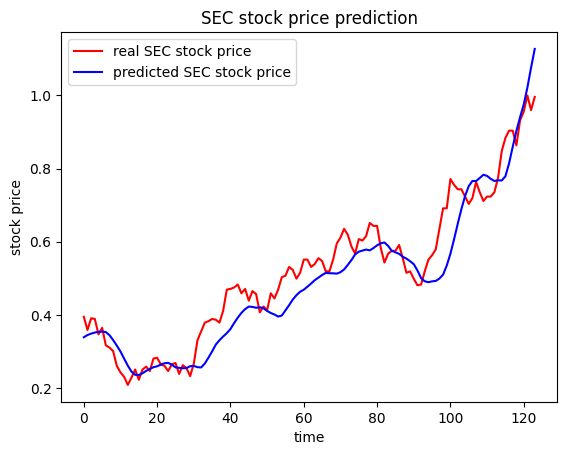

내일 SEC 주가 : [70512.13] KRW


In [40]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')


In [42]:
# !pip install torch

     ------------------------------------- 162.6/162.6 MB 13.3 MB/s eta 0:00:00


In [49]:
# !pip install torchsummary

Epoch 0, Loss: 0.016665486618876457
Epoch 10, Loss: 0.0038270100485533476
Epoch 20, Loss: 0.003447029273957014
Epoch 30, Loss: 0.002385439584031701
Epoch 40, Loss: 0.0010344614274799824
Epoch 50, Loss: 0.0009213907178491354
Epoch 60, Loss: 0.0015643712831661105


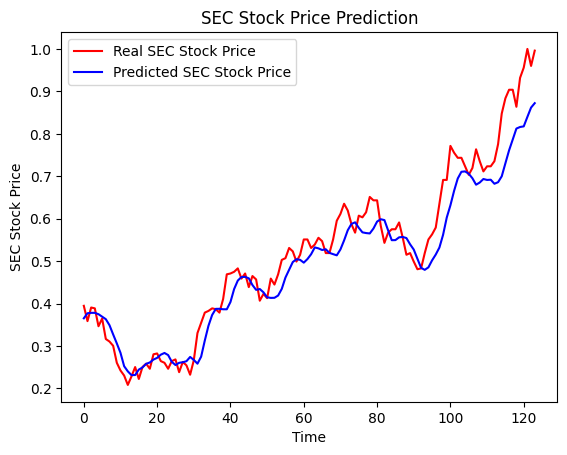

내일 SEC 주가 예측 (원래 스케일로 역변환): 59211.567273736 KRW


In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 데이터를 PyTorch Tensor로 변환
train_X_tensor = torch.Tensor(train_X)
train_y_tensor = torch.Tensor(train_y).view(-1, 1) 
test_X_tensor = torch.Tensor(test_X)
test_y_tensor = torch.Tensor(test_y).view(-1, 1)

# DataLoader 설정
train_data = TensorDataset(train_X_tensor, train_y_tensor)
test_data = TensorDataset(test_X_tensor, test_y_tensor)

train_loader = DataLoader(dataset=train_data, batch_size=30, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

# PyTorch LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out
    

# 모델 초기화
input_dim = 4
hidden_dim = 20
num_layers = 2
output_dim = 1

from torchsummary import summary
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 손실 함수와 옵티마이저 정의
# 모델 훈련
num_epochs = 70
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# 예측
model.eval()
with torch.no_grad():
    predicted = model(test_X_tensor).detach().numpy()

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure()
plt.plot(test_y_tensor.numpy(), color='red', label='Real SEC Stock Price')
plt.plot(predicted, color='blue', label='Predicted SEC Stock Price')
plt.title('SEC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SEC Stock Price')
plt.legend()
plt.show()

# 내일 SEC 주가 예측
# 예측된 마지막 값으로 내일 주가를 추정합니다. 실제 사용 시 정확도 확인 필요
last_predicted_price = predicted[-1][0]
def inverse_min_max_scaler(norm_data, min_val, max_val):
    """MinMaxScaler의 역변환 함수"""
    return norm_data * (max_val - min_val) + min_val

# 예시: 역변환을 위한 최소값과 최대값 (이 값들은 실제 데이터에서 계산해야 함)
min_val = df['Close'].min()
max_val = df['Close'].max()

# 마지막 예측값을 원래 스케일로 역변환
predicted_price_scaled = last_predicted_price  # 이 값은 PyTorch 모델의 예측 결과임
predicted_price = inverse_min_max_scaler(predicted_price_scaled, min_val, max_val)

print(f"내일 SEC 주가 예측 (원래 스케일로 역변환): {predicted_price} KRW")



----

In [63]:
# !pip install pystan


In [70]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('dataset.csv')
df.head()
df.isna().sum()

Time Date    0
Product      0
Store        0
Value        0
dtype: int64

In [74]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(64, 3, padding='same', activation='relu',input_shape=(8,8,3))) # [1]

model.add(layers.MaxPooling2D()) # [2]

model.add(layers.Conv2D(32, 3, activation='relu')) # [3]

model.add(layers.Dropout(0.2)) # [4]

model.add(layers.Flatten() )# [5]

model.add(layers.Dense(64, activation='relu')) # [6]

model.add(layers.Dropout(0.2)) # [7]

model.add(layers.Dense(64, activation='relu')) # [8]

model.add(layers.Dense(3, activation='softmax')) # [9]

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 32)          18464     
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                      